# Modelling The New-York Stock Exchange
### by Jérôme E. Blanchet, Senior Analyst | Data Scientist 

981 Gulf Pl, Ottawa, ON K1K 3X9 (613) 746-4120 
Jeromeblanchetmodelling@gmail.com

# Abstract

This paper is ...



# Table of Contents

# List of Tested Algorithms  
  
Benchmark (Classic Linear Based Algorithms):

-  Linear Regression...............................................................................................XXX  
-  Linear Regression Ridge...............................................................................................XXX  
-  Linear Regression Lasso...............................................................................................XXX  
-  Linear Regression ElasticNet............................................................................................XXX  
 
Tree Based Algorithms:

-  Single Decision Tree Regressor.............................................................................................XXX  
-  Decision Tree Bagging Regressor............................................................................................XXX  
-  Random Forest Regressor...............................................................................................XXX  
-  Extra Trees Regressor...............................................................................................XXX  
-  Ada Boost Regressor...............................................................................................XXX  
-  Gradient Boosting Regressor...............................................................................................XXX  
-  XGBoost Regressor...............................................................................................XXX  
-  Light GBM Regressor...............................................................................................XXX   
 
Neural Network and Stacking:

-  Neural Network with Keras (Tensorflow Backend).......................................................................XXX  
-  Neural Network with Tensorflow....................................................................................XXX  
-  Manual Stacking...............................................................................................XXX  
-  Marios Michailidis's StackNet.........................................................................................XXX 
 
Other Algorithms:

-  Support Vector Regression...............................................................................................XXX
-  K Neighbors Regressor...............................................................................................XXX


In [45]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
from __future__ import print_function
from __future__ import division
from scipy.stats import skew, boxcox
from scipy import stats
import statsmodels.api as sm
from pandas import DataFrame
from scipy.stats.stats import pearsonr
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.stats as stats
from mpl_toolkits.axes_grid.anchored_artists import AnchoredDrawingArea
import utils
#import skutils
import clone
from IPython.display import Image
from ggplot import *
#matplotlib.style.use('ggplot')

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold 
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sompy.visualization.mapview import View2D
#from sompy.visualization.umatrix import UMatrixView
#from sompy.visualization.histogram import Hist2d
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.tree import _tree
#from feature import DropInvariant, CombineLevels, SelectFeature, CreateFeature

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from deep_forest import MGCForest
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor

import tensorflow as tf
tf.python.control_flow_ops = tf
from keras.models import Sequential
from keras.models import save_model, load_model
from keras.layers.advanced_activations import PReLU
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD

import io
import requests

DATA1 = pd.read_csv("C:/Users/jeblanch/Documents/StockExchange.csv")

How many rows in that dataset?

In [46]:
DATA1.shape

(851264, 7)

List of variable names

In [47]:
DATA1.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

What is the number of missing value for each variable of that Dataset?

In [48]:
DATA1.isnull().sum(axis=0)

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

What type of variable do we get in that dataset?

In [49]:
dtype_DATA = DATA1.dtypes.reset_index()
dtype_DATA.columns = ["VARIABLE", "DType"]
dtype_DATA.groupby("DType").aggregate('count').reset_index()

,DType,VARIABLE
0,float64,5
1,object,2


In [50]:
DATA1.describe(include = 'all')

,date,symbol,open,close,low,high,volume
count,851264,851264,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
unique,1762,501,NaN,NaN,NaN,NaN,NaN
top,2016-08-03,SNI,NaN,NaN,NaN,NaN,NaN
freq,501,1762,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,NaN,NaN,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,NaN,NaN,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,NaN,NaN,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,NaN,NaN,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,NaN,NaN,75.120003,75.139999,74.400002,75.849998,5.222500e+06


View of the full Dataset

In [51]:
DATA1.head(20)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


Let's focus on Apple Stock

In [52]:
APPLE = DATA1[DATA1['symbol']=='AAPL']
APPLE.head(20)

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0
2593,2010-01-11,AAPL,30.400000,30.015715,29.778572,30.428572,115557400.0
3061,2010-01-12,AAPL,29.884285,29.674286,29.488571,29.967142,148614900.0
3529,2010-01-13,AAPL,29.695715,30.092857,29.157143,30.132856,151473000.0
3997,2010-01-14,AAPL,30.015715,29.918571,29.860001,30.065714,108223500.0
4465,2010-01-15,AAPL,30.132856,29.418571,29.410000,30.228571,148516900.0


In [53]:
APPLE.describe(include = 'all')

,date,symbol,open,close,low,high,volume
count,1762,1762,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
unique,1762,1,NaN,NaN,NaN,NaN,NaN
top,2011-02-03,AAPL,NaN,NaN,NaN,NaN,NaN
freq,1,1762,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,79.427744,79.402683,78.640034,80.140447,9.422578e+07
std,NaN,NaN,28.339001,28.330794,28.108525,28.561027,6.020519e+07
min,NaN,NaN,27.481428,27.435715,27.178572,28.000000,1.147590e+07
25%,NaN,NaN,55.401787,55.450000,54.672501,55.909286,4.917478e+07
50%,NaN,NaN,78.742146,78.435711,77.631428,79.344284,8.050385e+07
75%,NaN,NaN,102.979998,103.092503,102.500000,104.424997,1.210816e+08


In [54]:
APPLE = APPLE.close.values.astype('float32')
APPLE.shape

(1762,)

In [55]:
APPLE = APPLE.reshape(1762, 1)

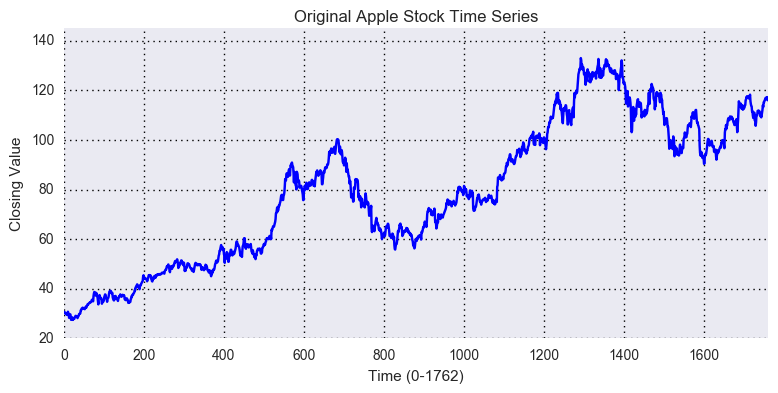

In [85]:
plt.figure(figsize=(20, 4))
plt.subplot(121)
ax = plt.gca()
ax.plot(APPLE, color='b')
plt.xlabel('Time (0-1762)')
plt.ylabel('Closing Value')
plt.title('Original Apple Stock Time Series')
plt.axis('tight')
plt.grid(color='black', linestyle='dotted')
plt.ylim([20,145])
plt.show()

Normalizing the data (no log transformation and no first & second differences)

In [68]:
scaler = MinMaxScaler(feature_range=(0, 1))
APPLE1 = scaler.fit_transform(APPLE)

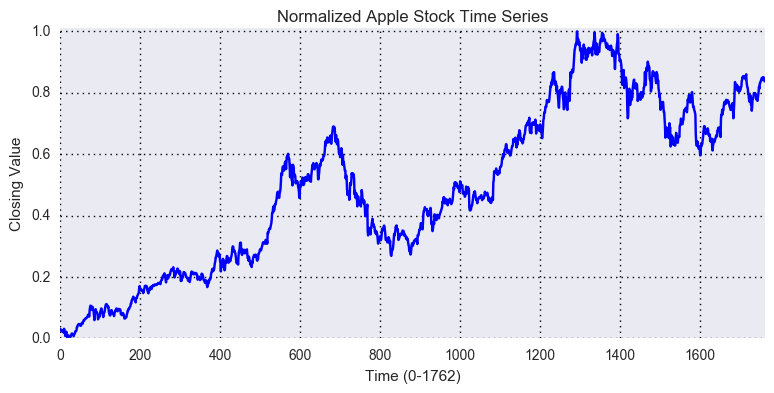

In [86]:
plt.figure(figsize=(20, 4))
plt.subplot(121)
ax = plt.gca()
ax.plot(APPLE1, color='b')
plt.xlabel('Time (0-1762)')
plt.ylabel('Closing Value')
plt.title('Normalized Apple Stock Time Series')
plt.axis('tight')
plt.grid(color='black', linestyle='dotted')
plt.ylim([0,1.01])
plt.show()

Generating Cross-sectional dataset from time-series data

In [87]:
look_back = 7

train_size = int(len(APPLE1) * 0.80)
test_size = len(APPLE1) - train_size
train, test = APPLE1[0:train_size,:], APPLE1[train_size:len(APPLE1),:]

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

### Modelling the Apple Stock with Long Short-Term Memory Recurrent Neural Network (LSTM RNN)

In [84]:
start_time = time.clock()

epochs = 10
batch_size = 32
np.random.seed(7)

model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=epochs, batch_size=batch_size, verbose=0)

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")


Total Estimation Running Time:
3.676839622000898 Seconds


# Bibliography

Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras
http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

Dropout Regularization in Deep Learning Models With Keras
http://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

The 5 Step Life-Cycle for Long Short-Term Memory Models in Keras
http://machinelearningmastery.com/5-step-life-cycle-long-short-term-memory-models-keras/